In [1]:
import pandas as pd
import numpy as np
import torch
from torch import optim as optim
from torch import nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
import torchvision
import torchvision.transforms as transforms
import random
np.random.seed(0)
torch.manual_seed(0)
random.seed(0)

In [3]:
transform = transforms.ToTensor()

training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

training_loader = torch.utils.data.DataLoader(training_set, batch_size=32, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

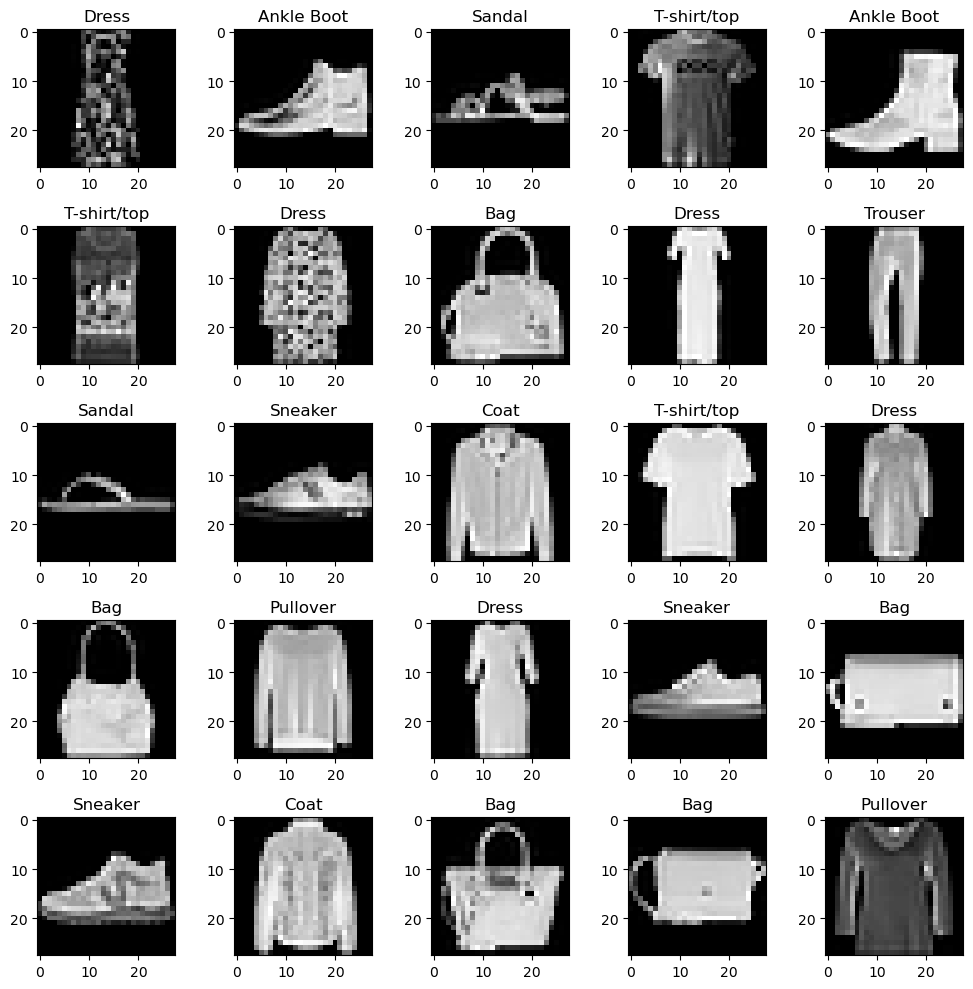

In [4]:
batch = next(iter(training_loader))
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(zip(*batch)):
    if i > 24:
        break
    plt.subplot(5, 5, i + 1)
    plt.imshow(image[0], cmap="gray")
    plt.title(classes[label])

plt.tight_layout()

# Model 1

In [79]:
class MLP1(torch.nn.Module):
    def __init__(self, input_shape, hidden_dim, output_shape):
        super(MLP1,self).__init__()
        self.fc1 = nn.Linear(input_shape, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_shape)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.output(x)
        return x

### Model 1 Architecture

In [113]:
input_size = 28*28  # Flattened image
hidden_dim = 128
output_size = 10       # 10 classes

In [114]:
model1 = MLP1(input_size, hidden_dim, output_size)
model = model1
model

MLP1(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

# Loss

In [115]:
loss_fn = nn.CrossEntropyLoss()

# Optimizer

In [116]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [149]:
def train_model(model, optimizer, training_loader, criterion=loss_fn, no_epochs=5):
    model.train()
    batches = []
    losses = []
    j = 0
    for epoch in range(no_epochs):
        running_loss = 0
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(training_loader):
            images = images.view(-1, 28 * 28)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()    
            optimizer.step()  
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            if i % 100 == 99:
                losses.append(running_loss/100)
                j += i
                batches.append(j)
                print(f"Epoch: {epoch}, Batch: {i+1}, Loss: {running_loss/100:.3f}, Accuracy: {100*correct/total:.2f}%")
                running_loss = 0

        if epoch % 2 == 0:
            print(f"Epoch {epoch+1} completed")
            
    return model, losses, batches

In [118]:
def plot_loss(losses, batches):
    plt.plot(batches, losses)
    plt.xlabel('Batches')
    plt.ylabel('Loss')
    plt.title('Loss vs. Batches')
    plt.show()

In [119]:
model1, losses, batches = train_model(model, optimizer, training_loader, loss_fn, no_epochs=5)

Epoch: 0, Batch: 99, Loss: 1.186, Accuracy: 55.34%
Epoch: 0, Batch: 199, Loss: 0.695, Accuracy: 64.31%
Epoch: 0, Batch: 299, Loss: 0.649, Accuracy: 67.81%
Epoch: 0, Batch: 399, Loss: 0.586, Accuracy: 70.77%
Epoch: 0, Batch: 499, Loss: 0.538, Accuracy: 72.81%
Epoch: 0, Batch: 599, Loss: 0.515, Accuracy: 74.26%
Epoch: 0, Batch: 699, Loss: 0.495, Accuracy: 75.39%
Epoch: 0, Batch: 799, Loss: 0.509, Accuracy: 76.13%
Epoch: 0, Batch: 899, Loss: 0.445, Accuracy: 76.98%
Epoch: 0, Batch: 999, Loss: 0.455, Accuracy: 77.62%
Epoch: 0, Batch: 1099, Loss: 0.483, Accuracy: 78.10%
Epoch: 0, Batch: 1199, Loss: 0.447, Accuracy: 78.54%
Epoch: 0, Batch: 1299, Loss: 0.466, Accuracy: 78.89%
Epoch: 0, Batch: 1399, Loss: 0.428, Accuracy: 79.29%
Epoch: 0, Batch: 1499, Loss: 0.427, Accuracy: 79.64%
Epoch: 0, Batch: 1599, Loss: 0.426, Accuracy: 79.93%
Epoch: 0, Batch: 1699, Loss: 0.409, Accuracy: 80.24%
Epoch: 0, Batch: 1799, Loss: 0.426, Accuracy: 80.49%
Epoch 1 completed
Epoch: 1, Batch: 99, Loss: 0.391, Accur

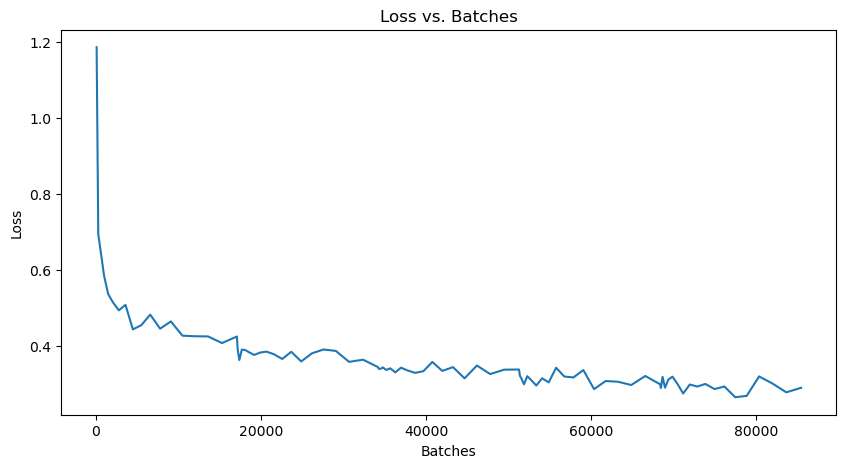

In [120]:
plt.figure(figsize=(10, 5))
plot_loss(losses, batches)

In [ ]:
def evaluate_model(model, loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0   # Counter for correctly classified samples
    total = 0     

   
    with torch.no_grad():  
        for images, labels in loader:
            images = images.view(-1, 28 * 28)  # Iterate through the DataLoader
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  
            
            # Update total sample count
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"\nTest Accuracy: {100 * correct / total:.2f}%")

In [122]:
evaluate_model(model1, validation_loader)


Test Accuracy: 86.01%


# Model 2

Let's change the layers and the neurons

In [123]:
class MLP2(torch.nn.Module):
    def __init__(self, input_shape, hidden_dim, output_shape):
        super(MLP2,self).__init__()
        self.fc1 = nn.Linear(input_shape, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, hidden_dim//2)
        self.output = nn.Linear(hidden_dim//2, output_shape)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.output(x)
        return x

### Model 2 Architecture

In [124]:
input_size = 28*28  # Flattened image
hidden_dim = 128
output_size = 10       # 10 classes

model2 = MLP2(input_size, hidden_dim, output_size)
model2

MLP2(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [125]:
model = model2
optimizer = optim.Adam(model.parameters(), lr=0.001)

model2, losses, batches  = train_model(model, optimizer, training_loader, loss_fn, no_epochs=5)

Epoch: 0, Batch: 99, Loss: 1.305, Accuracy: 49.88%
Epoch: 0, Batch: 199, Loss: 0.794, Accuracy: 59.78%
Epoch: 0, Batch: 299, Loss: 0.673, Accuracy: 64.76%
Epoch: 0, Batch: 399, Loss: 0.653, Accuracy: 67.70%
Epoch: 0, Batch: 499, Loss: 0.564, Accuracy: 70.22%
Epoch: 0, Batch: 599, Loss: 0.565, Accuracy: 71.86%
Epoch: 0, Batch: 699, Loss: 0.505, Accuracy: 73.31%
Epoch: 0, Batch: 799, Loss: 0.530, Accuracy: 74.25%
Epoch: 0, Batch: 899, Loss: 0.479, Accuracy: 75.20%
Epoch: 0, Batch: 999, Loss: 0.490, Accuracy: 75.95%
Epoch: 0, Batch: 1099, Loss: 0.503, Accuracy: 76.54%
Epoch: 0, Batch: 1199, Loss: 0.462, Accuracy: 77.09%
Epoch: 0, Batch: 1299, Loss: 0.458, Accuracy: 77.55%
Epoch: 0, Batch: 1399, Loss: 0.438, Accuracy: 77.98%
Epoch: 0, Batch: 1499, Loss: 0.460, Accuracy: 78.32%
Epoch: 0, Batch: 1599, Loss: 0.460, Accuracy: 78.60%
Epoch: 0, Batch: 1699, Loss: 0.419, Accuracy: 78.92%
Epoch: 0, Batch: 1799, Loss: 0.439, Accuracy: 79.17%
Epoch 1 completed
Epoch: 1, Batch: 99, Loss: 0.409, Accur

In [126]:
evaluate_model(model2, validation_loader)


Test Accuracy: 87.49%


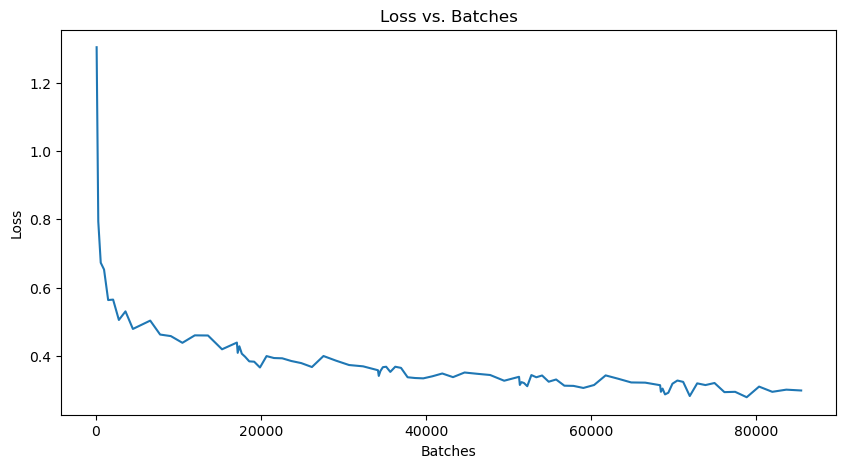

In [127]:
plt.figure(figsize=(10, 5))
plot_loss(losses, batches)

# Model 3

Let's try the same architecture of model 1 but change the activation fn and the optimizer.

In [156]:
class MLP3(torch.nn.Module):
    def __init__(self, input_shape, hidden_dim, output_shape):
        super(MLP3,self).__init__()
        self.fc1 = nn.Linear(input_shape, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_shape)

    def forward(self, x):
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.output(x)
        return x

In [157]:
input_size = 28*28  # Flattened image
hidden_dim = 128
output_size = 10  

In [158]:
model3 = MLP3(input_size, hidden_dim, output_size)
model3

MLP3(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [159]:
model = model3
optimizer = optim.NAdam(model.parameters(), lr=0.001)

model3, losses, batches  = train_model(model, optimizer, training_loader, loss_fn, no_epochs=5)

Epoch: 0, Batch: 100, Loss: 1.133, Accuracy: 57.12%
Epoch: 0, Batch: 200, Loss: 0.675, Accuracy: 65.86%
Epoch: 0, Batch: 300, Loss: 0.592, Accuracy: 70.12%
Epoch: 0, Batch: 400, Loss: 0.533, Accuracy: 72.68%
Epoch: 0, Batch: 500, Loss: 0.504, Accuracy: 74.59%
Epoch: 0, Batch: 600, Loss: 0.499, Accuracy: 75.98%
Epoch: 0, Batch: 700, Loss: 0.472, Accuracy: 76.96%
Epoch: 0, Batch: 800, Loss: 0.450, Accuracy: 77.86%
Epoch: 0, Batch: 900, Loss: 0.458, Accuracy: 78.53%
Epoch: 0, Batch: 1000, Loss: 0.434, Accuracy: 79.11%
Epoch: 0, Batch: 1100, Loss: 0.445, Accuracy: 79.52%
Epoch: 0, Batch: 1200, Loss: 0.433, Accuracy: 79.88%
Epoch: 0, Batch: 1300, Loss: 0.417, Accuracy: 80.26%
Epoch: 0, Batch: 1400, Loss: 0.427, Accuracy: 80.51%
Epoch: 0, Batch: 1500, Loss: 0.403, Accuracy: 80.80%
Epoch: 0, Batch: 1600, Loss: 0.385, Accuracy: 81.16%
Epoch: 0, Batch: 1700, Loss: 0.400, Accuracy: 81.40%
Epoch: 0, Batch: 1800, Loss: 0.388, Accuracy: 81.69%
Epoch 1 completed
Epoch: 1, Batch: 100, Loss: 0.341, Ac

In [160]:
evaluate_model(model3, validation_loader)


Test Accuracy: 87.76%


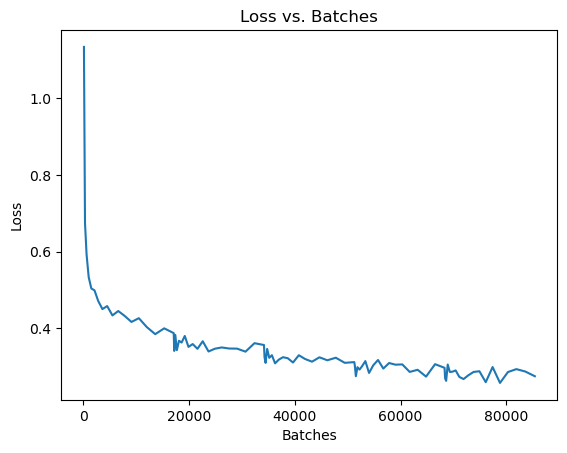

In [161]:
plot_loss(losses, batches)

## Notes of changes between (model1 and model2), (model1 and model3)

Changing the network depth and increasing the no. of perceptrons from model 1 to model 2 helped increase the test accuracy by 1.5 %, from 86% to 87.5%

While preserving the architecture of model 1 but changing the activation fn. to leaky_relu and optimizer to nesterov-Adam GD in model 3 helped increase the test accuracy from 86% to 87.76% 